<a href="https://colab.research.google.com/github/heimmer/profile/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
excel_file_path = './agoda case dataset/Case_Study_Urgency_Message_Data.xlsx'
xls = pd.ExcelFile(excel_file_path)
# sheet_names = xls.sheet_names
# sheet_names
a = pd.read_excel(excel_file_path, sheet_name='City_A')
b = pd.read_excel(excel_file_path, sheet_name='City_B')
c = pd.read_excel(excel_file_path, sheet_name='City_C')
d = pd.read_excel(excel_file_path, sheet_name='City_D')
e = pd.read_excel(excel_file_path, sheet_name='City_E')

In [25]:
a.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03


In [24]:
a.describe()

,#,ADR_USD,hotel_id,city_id,star_rating
count,22366.000000,22366.000000,2.236600e+04,22366.0,22366.000000
mean,11183.500000,100.508458,6.518594e+05,9395.0,3.557632
std,6456.652396,66.540211,6.973289e+05,0.0,0.841621
min,1.000000,4.260000,1.247000e+04,9395.0,0.000000
25%,5592.250000,52.205000,1.979960e+05,9395.0,3.000000
50%,11183.500000,83.500000,3.732720e+05,9395.0,3.500000
75%,16774.750000,128.140000,7.889700e+05,9395.0,4.000000
max,22366.000000,1099.693333,3.236904e+06,9395.0,5.000000


In [27]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        22366 non-null  int64         
 1   ADR_USD                  22366 non-null  float64       
 2   hotel_id                 22366 non-null  int64         
 3   city_id                  22366 non-null  int64         
 4   star_rating              22366 non-null  float64       
 5   accommadation_type_name  22366 non-null  object        
 6   chain_hotel              22366 non-null  object        
 7   booking_date             22366 non-null  datetime64[ns]
 8   checkin_date             22366 non-null  datetime64[ns]
 9   checkout_date            22366 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [28]:
a['days_book_in_advance'] = a['checkin_date'] - a['booking_date']

In [30]:
a.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60 days
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60 days
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60 days
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59 days
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59 days


In [63]:
a_cohort_adr_df

,days_book_in_advance,avg_ADR_USD
0,-1 days,148.980000
1,0 days,91.398522
2,1 days,94.288202
3,2 days,94.362392
4,3 days,100.084396
...,...,...
57,56 days,94.853252
58,57 days,118.298936
59,58 days,105.713419
60,59 days,111.691617


<Axes: >

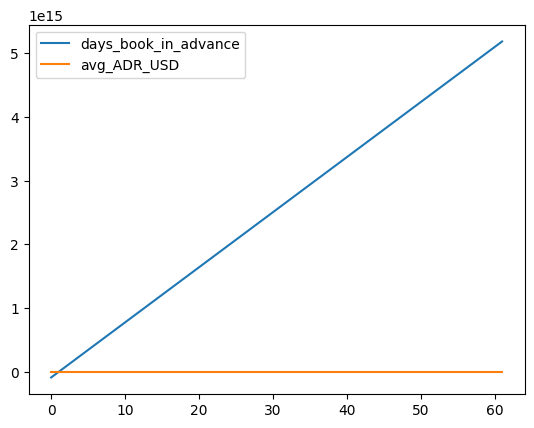

In [65]:
a_cohort_adr = pd.Series(a.groupby('days_book_in_advance')['ADR_USD'].mean(), name='avg_ADR_USD')
a_cohort_adr.index.name = 'days_book_in_advance'
a_cohort_adr_df = a_cohort_adr.reset_index()
a_cohort_adr_df.plot(kind='line')

TypeError: ignored

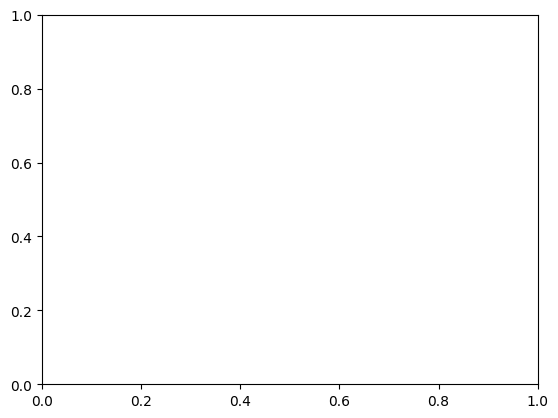

In [64]:
plt.scatter(a_cohort_adr_df['days_book_in_advance'],a_cohort_adr_df['avg_ADR_USD'])

In [59]:
type(a_cohort_adr_df)

method

In [32]:
a[a['days_book_in_advance'] == '-1 days']

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance
13263,13264,148.98,461164,9395,4.0,Hotel,chain,2016-11-13,2016-11-12,2016-11-13,-1 days
